# Single Node: Opening + visualizing a netCDF file (Python)

## Overview

> This notebook demonstrates how to open and explore the netCDF file, visualize the data, and convert it to Pandas as well as Spark DataFrames. This is for users just getting familiar with [netCDF climate and forecast (CF) metadata conventions](http://cfconventions.org/cf-conventions/v1.6.0/cf-conventions.html). __The example is mostly single node / non-distributed__; until the spark call at the end, it runs only on the cluster driver, which is something like running on a "laptop in the sky". 

## Source Data

The source data is a netCDF file, you can swap out for any data you are working with and follow the same basic pattern.

## Prerequisites

Python 3 or later. Python modules: we will add 'netCDF4', 'xarray', 'nc-time-axis', and 'cartopy' (numpy, pandas, matplotlib already available)

---
__Last Update:__ 07 NOV 2023 [Mosaic 0.3.12]

### 1. Import python modules
First import the required modules:

In [0]:
%pip install netCDF4 xarray nc-time-axis cartopy --quiet

Python interpreter will be restarted.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
Python interpreter will be restarted.


In [0]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr

### 2. Read and explore the netCDF file

> Example of reading in the netCDF file -- this is [Community Climate
 System Model project](https://www.cesm.ucar.edu/models/ccsm). Printing `in_nc` displays important information about the data sets, such as *global attributes*, *data dimensions*, and *variable names*. Global attributes in a netCDF file contains information about the data such as data authors, publisher, data contacts, etc.

__DataArray__

xarray.DataArray is an implementation of a labelled, multi-dimensional array for a single variable, such as precipitation, temperature etc. It has the following key properties:

<p/>

* `values`: a numpy.ndarray holding the array’s values
* `dims`: dimension names for each axis (e.g., ('lat', 'lon', 'z', 'time'))
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dim arrays of numbers, * DateTime objects, or strings)
* `attrs`: an OrderedDict to hold arbitrary metadata (attributes)

In [0]:
%sh 
# - again, this is single node
# - can just download to the driver and start working with it
wget https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc
ls -lh

--2023-11-21 16:12:04--  https://www.unidata.ucar.edu/software/netcdf/examples/sresa1b_ncar_ccsm3-example.nc
Resolving www.unidata.ucar.edu (www.unidata.ucar.edu)... 128.117.149.20
Connecting to www.unidata.ucar.edu (www.unidata.ucar.edu)|128.117.149.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2767916 (2.6M) [application/x-netcdf]
Saving to: ‘sresa1b_ncar_ccsm3-example.nc’

     0K .......... .......... .......... .......... ..........  1%  703K 4s
    50K .......... .......... .......... .......... ..........  3% 2.03M 2s
   100K .......... .......... .......... .......... ..........  5% 1.02M 2s
   150K .......... .......... .......... .......... ..........  7% 1.98M 2s
   200K .......... .......... .......... .......... ..........  9% 2.05M 2s
   250K .......... .......... .......... .......... .......... 11% 2.07M 2s
   300K .......... .......... .......... .......... .......... 12% 2.03M 2s
   350K .......... .......... .......... .......... ......

In [0]:
ds = xr.open_dataset("sresa1b_ncar_ccsm3-example.nc")
print(ds)

<xarray.Dataset>
Dimensions:    (lat: 128, lon: 256, bnds: 2, plev: 17, time: 1)
Coordinates:
  * lat        (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+03 2e+03 1e+03
  * time       (time) object 2000-05-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    area       (lat, lon) float32 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    msk_rgn    (lat, lon) int32 ...
    pr         (time, lat, lon) float32 ...
    tas        (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
    ua         (time, plev, lat, lon) float32 ...
Attributes: (12/18)
    CVS_Id:              $Id$
    creation_date:       
    prg_ID:              Source file unknown Version unknown Date unknown
    cmd_ln:              bds -x 256 -y 128 -m 23 -o /data/zender/data/dst_T85.nc
    h

In [0]:
ds.tas

<xarray.DataArray 'tas' (time: 1, lat: 128, lon: 256)>
[32768 values with dtype=float32]
Coordinates:
 * lat (lat) float32 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
 * lon (lon) float32 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
 * time (time) object 2000-05-16 12:00:00
Attributes:
 comment: Created using NCL code CCSM_atmm_2cf.ncl on\n machine ea...
 cell_methods: time: mean (interval: 1 month)
 history: Added height coordinate
 original_units: K
 original_name: TREFHT
 standard_name: air_temperature
 units: K
 long_name: air_temperature
 cell_method: time: mean xarray.DataArray 'tas' time : 1 lat : 128 lon : 256 ... [32768 values with dtype=float32] Coordinates: (3) lat (lat) float32 -88.93 -87.54 ... 87.54 88.93 long_name : latitude units : degrees_north axis : Y standard_name : latitude bounds : lat_bnds array([-88.927734, -87.538704, -86.14147 , -84.742386, -83.3426 , -81.94247 ,
 -80.542145, -79.14171 , -77.741196, -76.34063 , -74.940025, -73.53939 ,
 -72.13873 , -70.73806 , -69.33737 , -67.936676, -66.535965, -65.135254,
 -63.73453 , -62.3338 , -60.93307 , -59.532337, -58.1316 , -56.730858,
 -55.330112, -53.929367, -52.528618, -51.127865, -49.727116, -48.326363,
 -46.925606, -45.52485 , -44.124092, -42.723335, -41.322575, -39.921818,
 -38.521057, -37.120293, -35.719532, -34.31877 , -32.918007, -31.517244,
 -30.11648 , -28.715715, -27.31495 , -25.914186, -24.51342 , -23.112656,
 -21.71189 , -20.311123, -18.910357, -17.50959 , -16.108824, -14.708057,
 -13.30729 , -11.906524, -10.505756, -9.104989, -7.704221, -6.303454,
 -4.902687, -3.501919, -2.101151, -0.700384, 0.700384, 2.101151,
 3.501919, 4.902687, 6.303454, 7.704221, 9.104989, 10.505756,
 11.906524, 13.30729 , 14.708057, 16.108824, 17.50959 , 18.910357,
 20.311123, 21.71189 , 23.112656, 24.51342 , 25.914186, 27.31495 ,
 28.715715, 30.11648 , 31.517244, 32.918007, 34.31877 , 35.719532,
 37.120293, 38.521057, 39.921818, 41.322575, 42.723335, 44.124092,
 45.52485 , 46.925606, 48.326363, 49.727116, 51.127865, 52.528618,
 53.929367, 55.330112, 56.730858, 58.1316 , 59.532337, 60.93307 ,
 62.3338 , 63.73453 , 65.135254, 66.535965, 67.936676, 69.33737 ,
 70.73806 , 72.13873 , 73.53939 , 74.940025, 76.34063 , 77.741196,
 79.14171 , 80.542145, 81.94247 , 83.3426 , 84.742386, 86.14147 ,
 87.538704, 88.927734], dtype=float32) lon (lon) float32 0.0 1.406 2.812 ... 357.2 358.6 long_name : longitude units : degrees_east axis : X standard_name : longitude bounds : lon_bnds array([ 0. , 1.40625, 2.8125 , ..., 355.78125, 357.1875 , 358.59375],
 dtype=float32) time (time) object 2000-05-16 12:00:00 standard_name : time axis : T bounds : time_bnds long_name : time array([cftime.DatetimeNoLeap(2000, 5, 16, 12, 0, 0, 0, has_year_zero=True)],
 dtype=object) Indexes: (3) lat PandasIndex PandasIndex(Float64Index([ -88.927734375, -87.53870391845703, -86.14147186279297,
 -84.74238586425781, -83.34259796142578, -81.94246673583984,
 -80.54214477539062, -79.14170837402344, -77.74119567871094,
 -76.34062957763672,
 ...
 76.34062957763672, 77.74119567871094, 79.14170837402344,
 80.54214477539062, 81.94246673583984, 83.34259796142578,
 84.74238586425781, 86.14147186279297, 87.53870391845703,
 88.927734375],
 dtype='float64', name='lat', length=128)) lon PandasIndex PandasIndex(Float64Index([ 0.0, 1.40625, 2.8125, 4.21875, 5.625, 7.03125,
 8.4375, 9.84375, 11.25, 12.65625,
 ...
 345.9375, 347.34375, 348.75, 350.15625, 351.5625, 352.96875,
 354.375, 355.78125, 357.1875, 358.59375],
 dtype='float64', name='lon', length=256)) time PandasIndex PandasIndex(CFTimeIndex([2000-05-16 12:00:00],
 dtype='object', length=1, calendar='noleap', freq=None)) Attributes: (9) comment : Created using NCL code CCSM_atmm_2cf.ncl on
 machine eagle163s cell_methods : time: mean (interval: 1 month) history : Added height coordinate original_units : K original_name : TREFHT standard_name : air_temperature units : K long_name : air_temperature cell_method : time: mean

### 3. Plot a Variable

> In this case air temperature ('tas') in Kelvins.

Out[7]: <cartopy.mpl.geocollection.GeoQuadMesh at 0x7faa2ee871f0>

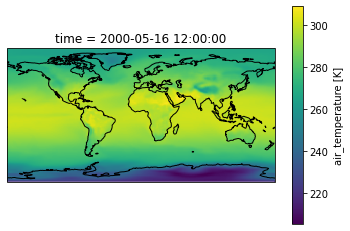

In [0]:
# - Example-1: a simple plot
ax = plt.axes(projection=ccrs.PlateCarree()) # equidistance
ax.coastlines() 
ds.tas.plot()

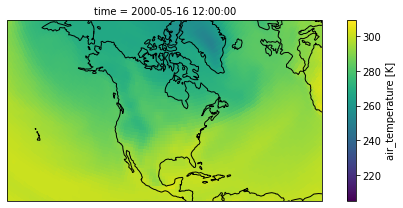

In [0]:
 # Example-2
 # - pick the center
 # - handle data and plot projection
 p = ds.tas.plot(
    transform=ccrs.PlateCarree(),                  # data's projection (equidistance)
    col="time",                                    # time
    col_wrap=1,                                    # multiplot settings
    aspect=ds.dims["lon"] / ds.dims["lat"],        # for a sensible figsize
    subplot_kws={                                  # plot projection (conic)
      "projection": 
      ccrs.LambertConformal(
        central_longitude=-95, central_latitude=45
      )},
)

# set options
for ax in p.axs.flat:
    ax.coastlines()
    ax.set_extent([-160, -30, 5, 75])

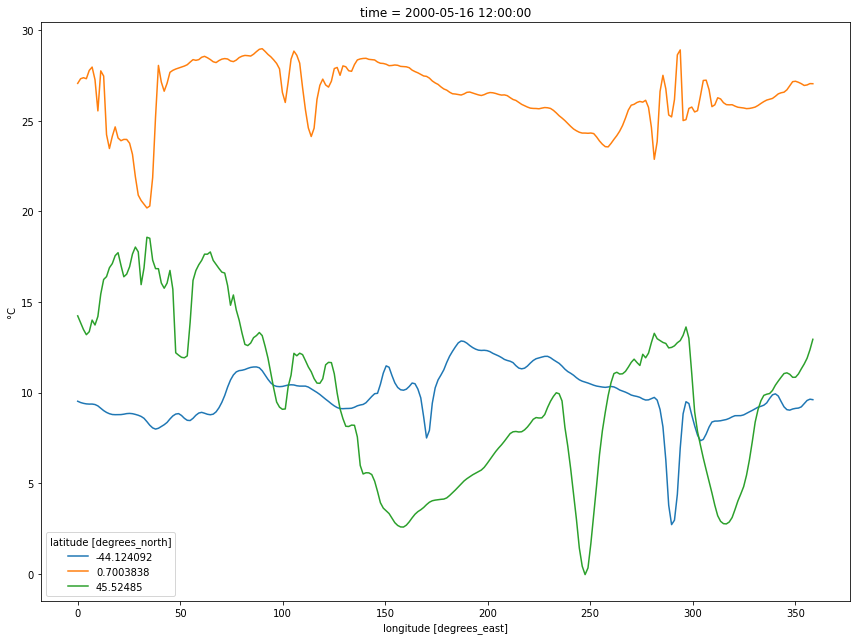

In [0]:
# Example-3: Kelvin to Celsius
airc = ds.tas - 273.15  

# Figure
# - can easily adjust this for multipe subplots
f, ax1 = plt.subplots(1, 1, figsize=(12, 9), sharey=True)

# Selected latitude indices
# - there are 128 lats, so 64 is around equator
isel_lats = [32, 64, 96]

# Temperature vs longitude plot 
# - lons are 0..360
# - we are filtering to just 1 day (in this case that's all there is)
airc.isel(time=0, lat=isel_lats).plot.line(ax=ax1, hue="lat")
ax1.set_ylabel("°C")

plt.tight_layout()

In [0]:
# convert air temp from kelvins to fahrenheit (for fun)
airf = (ds.tas * 1.8) - 459.67
airf[0][45][0] # <- here is a reading at time[0], lat[45], lon[0]

<xarray.DataArray 'tas' ()>
array(67.66379, dtype=float32)
Coordinates:
 lat float32 -25.91
 lon float32 0.0
 time object 2000-05-16 12:00:00 xarray.DataArray 'tas' 67.66 array(67.66379, dtype=float32) Coordinates: (3) lat () float32 -25.91 long_name : latitude units : degrees_north axis : Y standard_name : latitude bounds : lat_bnds array(-25.914186, dtype=float32) lon () float32 0.0 long_name : longitude units : degrees_east axis : X standard_name : longitude bounds : lon_bnds array(0., dtype=float32) time () object 2000-05-16 12:00:00 standard_name : time axis : T bounds : time_bnds long_name : time array(cftime.DatetimeNoLeap(2000, 5, 16, 12, 0, 0, 0, has_year_zero=True),
 dtype=object) Indexes: (0) Attributes: (0)

### 4. Output to Pandas and Spark DataFrames

> We see that each variable and coordinate in the Dataset is now a column in the DataFrame, with the exception of indexes which are in the index. To convert the DataFrame to any other convenient representation, use DataFrame methods like `reset_index()`, `stack()` and `unstack()`.

_Note: We can save the Xarray Dataset to various formats, just focusing on Pandas for brevity._

__First let's convert time to DateTime Index (from CFTimeIndex)__

In [0]:
from datetime import datetime

ds_times = ds.indexes['time'].to_datetimeindex()
print(ds_times)

ds['time'] = ds_times

DatetimeIndex(['2000-05-16 12:00:00'], dtype='datetime64[ns]', freq=None)


<command-2453819347886305>:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds_times = ds.indexes['time'].to_datetimeindex()


In [0]:
pdf = ds.to_dataframe().reset_index() # <- pandas
print(f'rows? {pdf.shape[0]:,}, cols? {pdf.shape[1]}')
pdf.head()

rows? 1,114,112, cols? 13


,lat,lon,bnds,plev,time,area,lat_bnds,lon_bnds,msk_rgn,pr,tas,time_bnds,ua
0,-88.927734,0.0,0,100000.0,2000-05-16 12:00:00,473460608.0,-90.0,-0.703125,0,0.000001,215.893494,2000-05-01 00:00:00,NaN
1,-88.927734,0.0,0,92500.0,2000-05-16 12:00:00,473460608.0,-90.0,-0.703125,0,0.000001,215.893494,2000-05-01 00:00:00,NaN
2,-88.927734,0.0,0,85000.0,2000-05-16 12:00:00,473460608.0,-90.0,-0.703125,0,0.000001,215.893494,2000-05-01 00:00:00,NaN
3,-88.927734,0.0,0,70000.0,2000-05-16 12:00:00,473460608.0,-90.0,-0.703125,0,0.000001,215.893494,2000-05-01 00:00:00,NaN
4,-88.927734,0.0,0,60000.0,2000-05-16 12:00:00,473460608.0,-90.0,-0.703125,0,0.000001,215.893494,2000-05-01 00:00:00,-0.703753


In [0]:
pdf.dtypes

Out[14]: lat                 float64
lon                 float64
bnds                  int64
plev                float64
time         datetime64[ns]
area                float32
lat_bnds            float64
lon_bnds            float64
msk_rgn               int32
pr                  float32
tas                 float32
time_bnds            object
ua                  float32
dtype: object

__Can convert to a Spark DataFrame.__

> Note: we are dropping "*_bnds" and "msk_rgn" columns for simplicity.

In [0]:
df = (
  spark
    .createDataFrame(
      pdf.drop(columns=["bnds", "time_bnds", "lat_bnds", "lon_bnds", "msk_rgn"])
    )
    #.distinct() # <- not needed
)
print(f"count? {df.count():,}")
df.limit(10).display()

count? 1,114,112


lat,lon,plev,time,area,pr,tas,ua
-88.927734375,0.0,100000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,null
-88.927734375,0.0,92500.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,null
-88.927734375,0.0,85000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,null
-88.927734375,0.0,70000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,null
-88.927734375,0.0,60000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,-0.70375293
-88.927734375,0.0,50000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,-1.4543961
-88.927734375,0.0,40000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,-2.1575398
-88.927734375,0.0,30000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,-2.320977
-88.927734375,0.0,25000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,-1.9883183
-88.927734375,0.0,20000.0,2000-05-16T12:00:00.000+0000,4.73460608E8,1.0915462E-6,215.8935,-1.5386307


In [0]:
from pyspark.sql import functions as F
from pyspark.sql.functions import col

In [0]:
# You can visualize this plot in Databricks
# - hint: press the '+' button below
display(
  df
    .groupBy(F.expr("ceil(lat) as lat_degree"))
    .agg(
      F.mean(col("plev")).alias("plev_avg"),
      F.mean(col("pr")).alias("pr_avg"),
      F.mean(col("tas")).alias("tas_avg"),
      F.mean(col("ua")).alias("ua_avg")
    )
)

lat_degree,plev_avg,pr_avg,tas_avg,ua_avg
-88,36205.882352941175,1.407552143284363E-6,217.07533127069473,0.715708841607833
-87,36205.882352941175,1.468051382458313E-6,219.7624340057373,1.6284686288521613
-86,36205.882352941175,1.5245482806180988E-6,223.06404215097427,2.7873747913918647
-84,36205.882352941175,1.6745170340337623E-6,225.77972197532654,4.2820890932200335
-83,36205.882352941175,1.8137844463028685E-6,227.5041783452034,5.726601821867347
-81,36205.882352941175,1.7317814833273104E-6,227.7553179860115,7.4828300487098796
-80,36205.882352941175,2.092438653955586E-6,227.4436286687851,9.309421336565226
-79,36205.882352941175,3.095372376971106E-6,227.99505418539047,10.981656906893834
-77,36205.882352941175,5.237449556383389E-6,229.67675912380219,12.499625367135527
-76,36205.882352941175,7.134318825485764E-6,231.32146954536438,13.954102117710605


Databricks visualization. Run in Databricks to view.

### 5. Databricks Lakehouse can read / write most any data format

> Here are [built-in](https://docs.databricks.com/en/external-data/index.html) formats as well as Mosaic [readers](https://databrickslabs.github.io/mosaic/api/api.html). __Note: best performance with Delta Lake format__, ref [Databricks](https://docs.databricks.com/en/delta/index.html) and [OSS](https://docs.delta.io/latest/index.html) docs for Delta Lake. Beyond built-in formats, Databricks is a platform on which you can install a wide variety of libraries, e.g. [1](https://docs.databricks.com/en/libraries/index.html#python-environment-management) | [2](https://docs.databricks.com/en/compute/compatibility.html) | [3](https://docs.databricks.com/en/init-scripts/index.html).

Example of [reading](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameReader.html?highlight=read#pyspark.sql.DataFrameReader) and [writing](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameWriter.html?highlight=pyspark%20sql%20dataframe%20writer#pyspark.sql.DataFrameWriter) a Spark DataFrame with Delta Lake format.

```
# - `write.format("delta")` is default in Databricks
# - can save to a specified rawPath in the Lakehouse
# - can save as a table in the Databricks Metastore
df.write.save("<some_path>")
df.write.saveAsTable("<some_delta_table>")
```

Example of loading a Delta Lake Table as a Spark DataFrame.

```
# - `read.format("delta")` is default in Databricks
# - can load a specified rawPath in the Lakehouse
# - can load a table in the Databricks Metastore
df.read.load("<some_path>")
df.table("<some_delta_table>")
```

More on [Unity Catalog](https://docs.databricks.com/en/data-governance/unity-catalog/index.html) in Databricks Lakehouse for Governing [Tables](https://docs.databricks.com/en/data-governance/unity-catalog/index.html#tables) and [Volumes](https://docs.databricks.com/en/data-governance/unity-catalog/index.html#volumes).